In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
df=pd.read_csv(r"F:\Data Science\Pandas Dataset\UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [1]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

NameError: name 'df' is not defined

<Axes: >

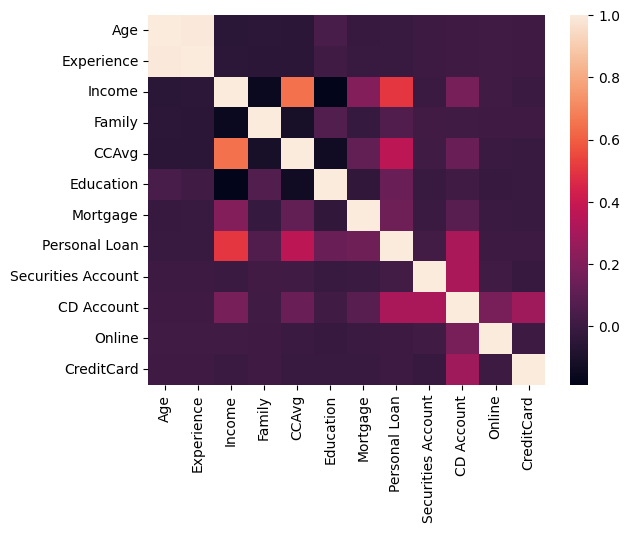

In [8]:
import seaborn as sns
sns.heatmap(df.corr())


In [9]:
df.cov()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,131.404166,130.698543,-29.164822,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,130.698543,131.513962,-24.587099,-0.691802,-1.003637,0.126673,-12.342843,-0.025047,-0.004321,0.028288,0.078190,0.046857
Income,-29.164822,-24.587099,2119.104235,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
Family,-0.610664,-0.691802,-8.320957,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-1.041997,-1.003637,51.970200,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,0.397949,0.126673,-7.250120,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-14.619518,-12.342843,968.321693,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-0.026092,-0.025047,6.814640,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376
Securities Account,-0.001529,-0.004321,-0.036834,0.007017,0.008063,-0.002777,-0.168308,0.001978,0.093519,0.023099,0.001894,-0.002094
CD Account,0.021965,0.028288,1.861611,0.003858,0.056850,0.002788,2.164305,0.022206,0.023099,0.056763,0.020557,0.030248


Understanding how features are related through the covariance matrix involves examining both the **variance** (diagonal values) and the **covariance** (off-diagonal values). Here's a breakdown:

---

### **1. Variance (Diagonal Values)**
Variance measures how much a feature varies from its mean.

#### **High Variance**
- A high variance indicates a wide range of values.
- For example, `Income` (**2119.10**) and `Mortgage` (**10345.70**) have the largest variances.
- High variance features often dominate in models unless scaled. They could contain valuable information but might also require normalization.

#### **Low Variance**
- A low variance indicates a narrow range of values.
- For example, `Securities Account` (**0.094**) and `CreditCard` (**0.208**) have very low variances.
- Such features may contribute little to model performance and could potentially be removed after further analysis.

---

### **2. Covariance (Off-Diagonal Values)**
Covariance measures the relationship between two features. It indicates whether two features increase/decrease together or if they move in opposite directions.

#### **Positive Covariance**
- Indicates that as one feature increases, the other tends to increase.
- For example:
  - `Age` and `Experience` (**130.70**) are positively correlated, meaning older individuals tend to have more experience.

#### **Negative Covariance**
- Indicates that as one feature increases, the other tends to decrease.
- For example:
  - `Income` and `Age` (**-29.16**) are negatively correlated, suggesting that older individuals may tend to have slightly lower income in this dataset.

#### **Low Covariance**
- Values close to **0** suggest a weak or no linear relationship.
- For example:
  - `Age` and `CreditCard` (**0.040**) are weakly correlated, meaning they likely don't influence each other directly.

---

### **3. Identifying Negligible Features**
Features that can be cut off might exhibit:
- **Low Variance**: They don't vary much and thus provide limited information.
  - Example: `Securities Account` (**0.094**) and `CreditCard` (**0.208**) have very low variances.
- **Weak Covariance with Target Variable**: Features that are not strongly related to the target variable might not be important for predictive modeling.

---

### **4. Importance of Scaling**
Features with high variance (e.g., `Income`, `Mortgage`) can dominate model behavior if not scaled. Techniques like **standardization (z-score normalization)** or **min-max scaling** ensure all features are on a comparable scale.

---

### Summary of Insights:
- **Key Features** (High Variance or Strong Covariance with Target): `Income`, `Mortgage`, and `CCAvg`.
- **Potentially Negligible Features**: `Securities Account`, `Online`, and `CreditCard` due to low variance and weak relationships with other variables.


In [11]:
df.cov().max()

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                    51.970200
Education                 0.705380
Mortgage              10345.697538
Personal Loan             6.814640
Securities Account        0.093519
CD Account                2.164305
Online                    0.320822
CreditCard                0.207606
dtype: float64

In [6]:
x=df.drop("CreditCard",axis=1)
y=df["CreditCard"]

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_new=scaler.fit_transform(x)
print(max(cross_val_score(LogisticRegression(),x_new,y,cv=4)))

0.7528


In [8]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y,cv=4))

[0.6448 0.6576 0.6384 0.6496]


In [9]:
print(cross_val_score(SVC(kernel="rbf",gamma="auto"),x,y,cv=4))

[0.6968 0.6944 0.6928 0.6816]


In [10]:
print(max(cross_val_score(RandomForestClassifier(),x_new,y,cv=4)))

0.72


In [11]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [12]:
trial=GridSearchCV(
    SVC(gamma="auto"),
    {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'C':[0.1, 1, 10]
    },
    cv=5,
    return_train_score=False
)

In [ ]:
trial.fit(x_new,y)

In [46]:
d=pd.DataFrame(trial.cv_results_)
d.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.548679,0.117595,0.111052,0.024033,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,3
1,0.882926,0.321767,0.126244,0.015412,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.706,0.706,0.706,0.706,0.706,0.7060,0.000000,11
2,1.251488,0.202835,0.619586,0.082292,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,3
3,1.162667,0.070472,0.165841,0.024112,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,3
4,0.508912,0.092225,0.102039,0.040717,1,linear,"{'C': 1, 'kernel': 'linear'}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,3


In [47]:
d.head()["mean_test_score"].max()

0.7415999999999999

In [50]:
trial=RandomizedSearchCV(
    SVC(gamma="auto"),
    {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'C':[0.1, 1, 10]
    },
    cv=5,
    return_train_score=False,
    n_iter=5
)

In [51]:
trial.fit(x_new,y)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [52]:
d=pd.DataFrame(trial.cv_results_)
d.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.357827,0.178663,0.211273,0.050191,sigmoid,0.1,"{'kernel': 'sigmoid', 'C': 0.1}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,2
1,0.546129,0.092634,0.136006,0.056725,linear,1,"{'kernel': 'linear', 'C': 1}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,2
2,1.293006,0.200329,0.704663,0.092527,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.741,0.737,0.735,0.744,0.751,0.7416,0.005643,2
3,0.716183,0.113029,0.127852,0.013384,poly,1,"{'kernel': 'poly', 'C': 1}",0.739,0.736,0.733,0.738,0.747,0.7386,0.004673,5
4,0.852249,0.091511,0.116255,0.012273,poly,10,"{'kernel': 'poly', 'C': 10}",0.746,0.746,0.738,0.742,0.751,0.7446,0.004363,1


In [53]:
d.head()["mean_test_score"].max()

0.7445999999999999

# Chatgpt modification

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd

# Drop unnecessary columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

# Define features and target
x = df.drop("CreditCard", axis=1)
y = df["CreditCard"]

# Scale the data using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Logistic Regression Cross-Validation
from sklearn.linear_model import LogisticRegression
log_reg_accuracy = max(cross_val_score(LogisticRegression(), x_scaled, y, cv=4))
print("Logistic Regression Best Accuracy:", log_reg_accuracy)

# Grid Search for SVM
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(gamma="auto"), param_grid, cv=5, return_train_score=False)
grid_search.fit(x_scaled, y)

# Display best parameters and accuracy from Grid Search
print("Best Grid Search Accuracy:", grid_search.best_score_)
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Randomized Search for SVM
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10]
}
random_search = RandomizedSearchCV(
    SVC(gamma="auto"), param_dist, cv=5, return_train_score=False, n_iter=5, random_state=42
)
random_search.fit(x_scaled, y)

# Display best parameters and accuracy from Randomized Search
print("Best Random Search Accuracy:", random_search.best_score_)
print("Best Parameters from Randomized Search:", random_search.best_params_)


Best Grid Search Accuracy: 0.7452
Best Random Search Accuracy: 0.744
